In [77]:
# Import all required packages
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Insert your result file name here 
filename = "results"

# Open JSON result file
file = open(filename + ".json")

# Return JSON object as a dictionary
data = json.load(file)

# Print the result file in the console
print("Results:")
print(json.dumps(data, indent = 1))

Results:
{
 "experiment": "bc9b82de-ce8f-440d-a3de-3ab636b611d8",
 "startTime": "2021-12-22T15:27:57.390613Z",
 "totalCounts": 50000,
 "numberOfDetectors": 4,
 "singlePhotonRate": "1500.00",
 "totalTime": 3,
 "experimentData": {
  "countratePerDetector": {
   "d1": 123,
   "d2": 123,
   "d3": 456,
   "d4": 123,
   "d5": 123,
   "d6": 456,
   "d7": 123,
   "d8": 123
  },
  "coincidenceCounts": {
   "c00": 345,
   "c01": 15064,
   "c10": 13444,
   "c11": 99
  }
 }
}


In [78]:
# Access single countrates
singleCounts = data["experimentData"]["countratePerDetector"]
print("Single Counts per Detector:")
print(singleCounts)

# Access coincidence counts 
coincidenceCounts = data["experimentData"]["coincidenceCounts"]
print("Coincidence Counts:")
print(coincidenceCounts)

Single Counts per Detector:
{'d1': 123, 'd2': 123, 'd3': 456, 'd4': 123, 'd5': 123, 'd6': 456, 'd7': 123, 'd8': 123}
Coincidence Counts:
{'c00': 345, 'c01': 15064, 'c10': 13444, 'c11': 99}


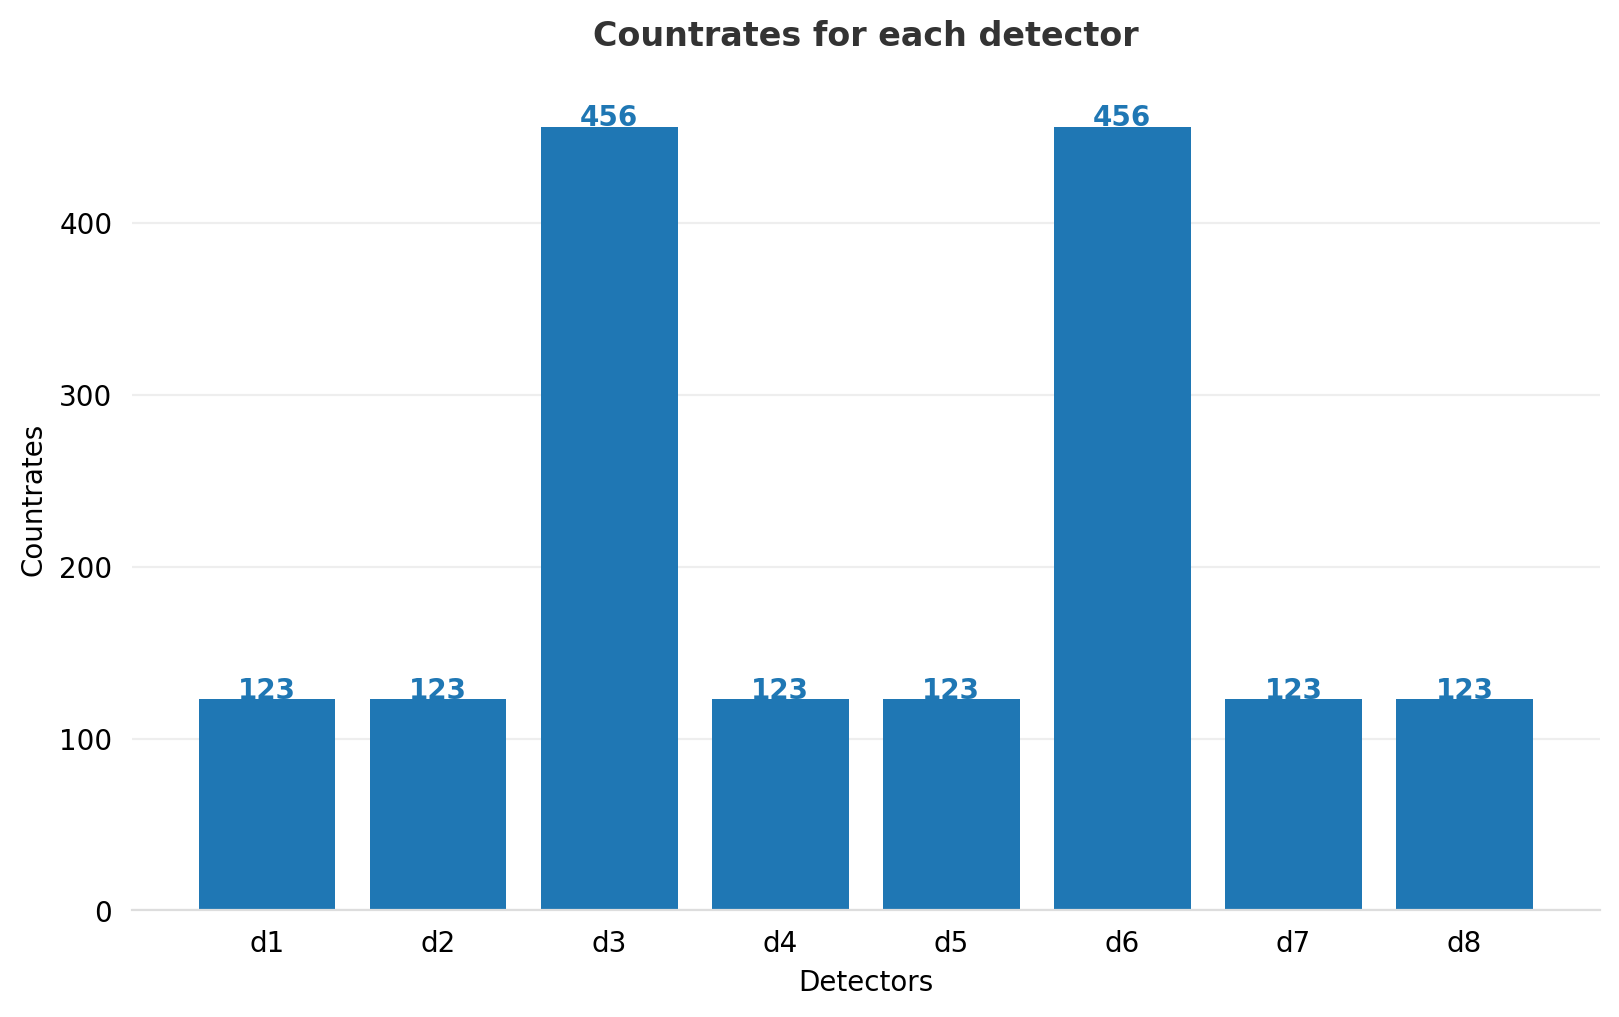

In [83]:
# Plot single countrates

# Colab sets some Seaborn styles by default; let's revert to the default
# Matplotlib styles and plot
plt.rcdefaults()

# Increase the quality and resolution of our charts
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)

# Set default figure size
plt.rcParams['figure.figsize'] = (8, 5)

# Create bar chart
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below
bars = ax.bar(
    singleCounts.keys(), singleCounts.values()
)

# Remove the top, right and left spines (figure borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Also, make the bottom spine gray instead of black
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Grab the color of the bars so we can make the
# text the same color
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Set bar chart title
ax.set_title('Countrates for each detector', pad=15, color='#333333',
             weight='bold')

# Make the chart fill out the figure better
fig.tight_layout()

plt.ylabel("Countrates")
plt.xlabel("Detectors")
plt.show()

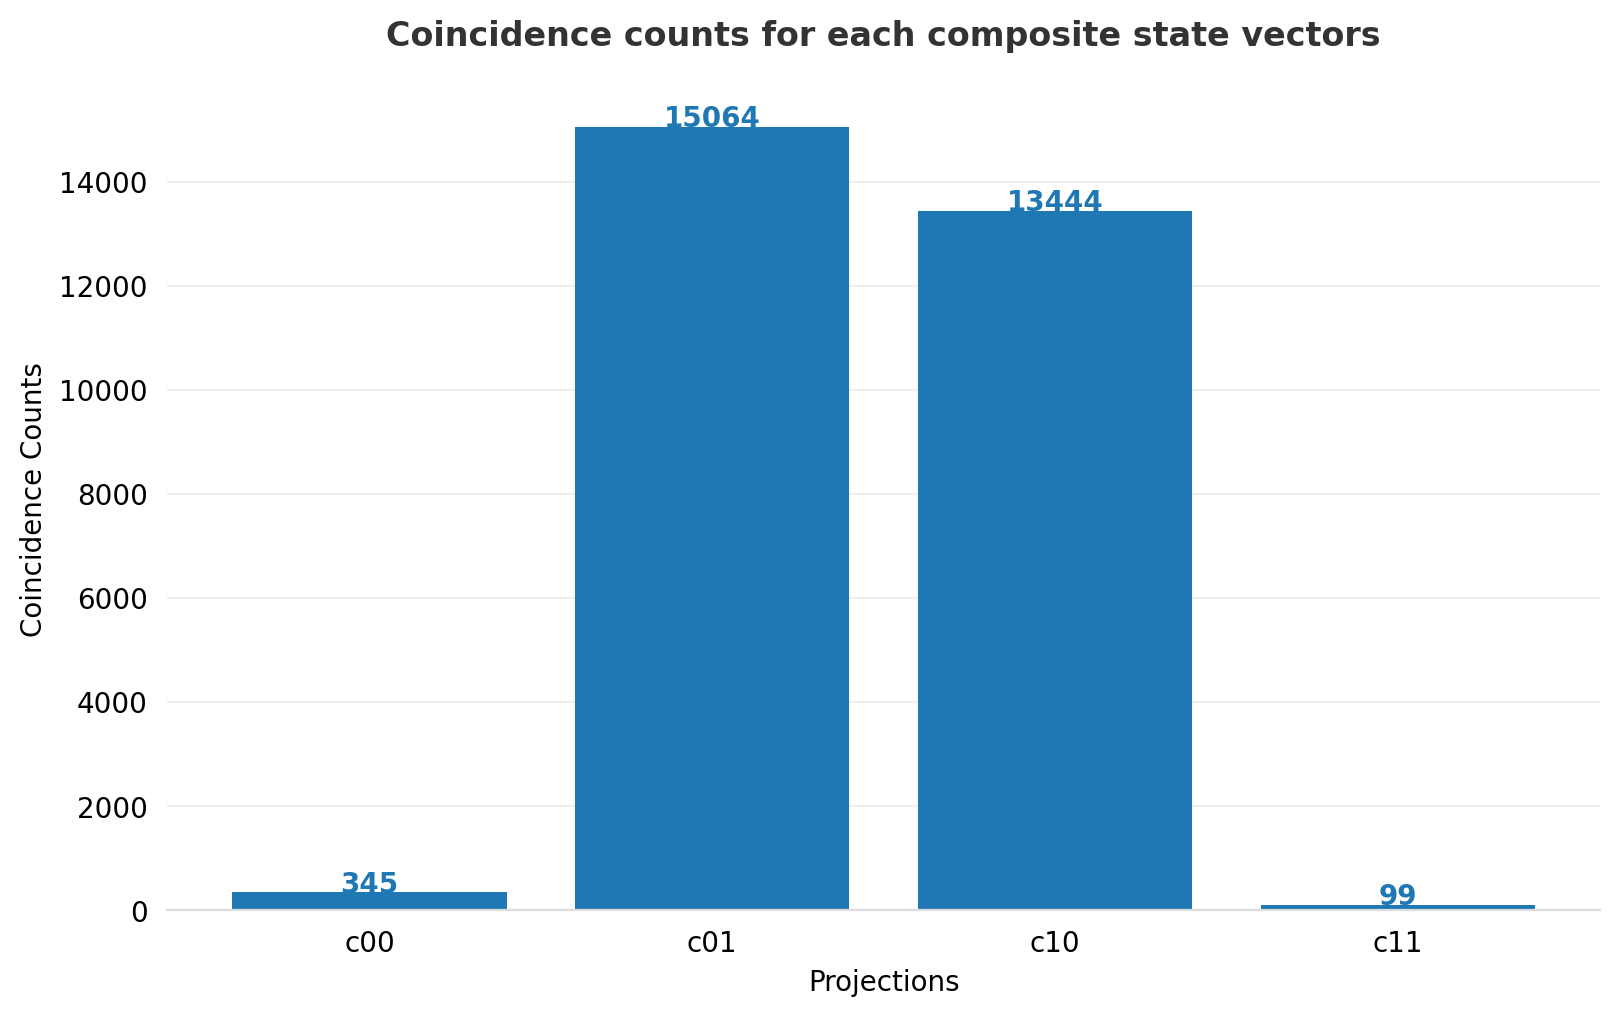

In [84]:
# Plot coincidence counts

plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()

bars = ax.bar(
    coincidenceCounts.keys(), coincidenceCounts.values()
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.8,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_title('Coincidence counts for each composite state vectors', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

plt.ylabel("Coincidence Counts")
plt.xlabel("Projections")
plt.show()

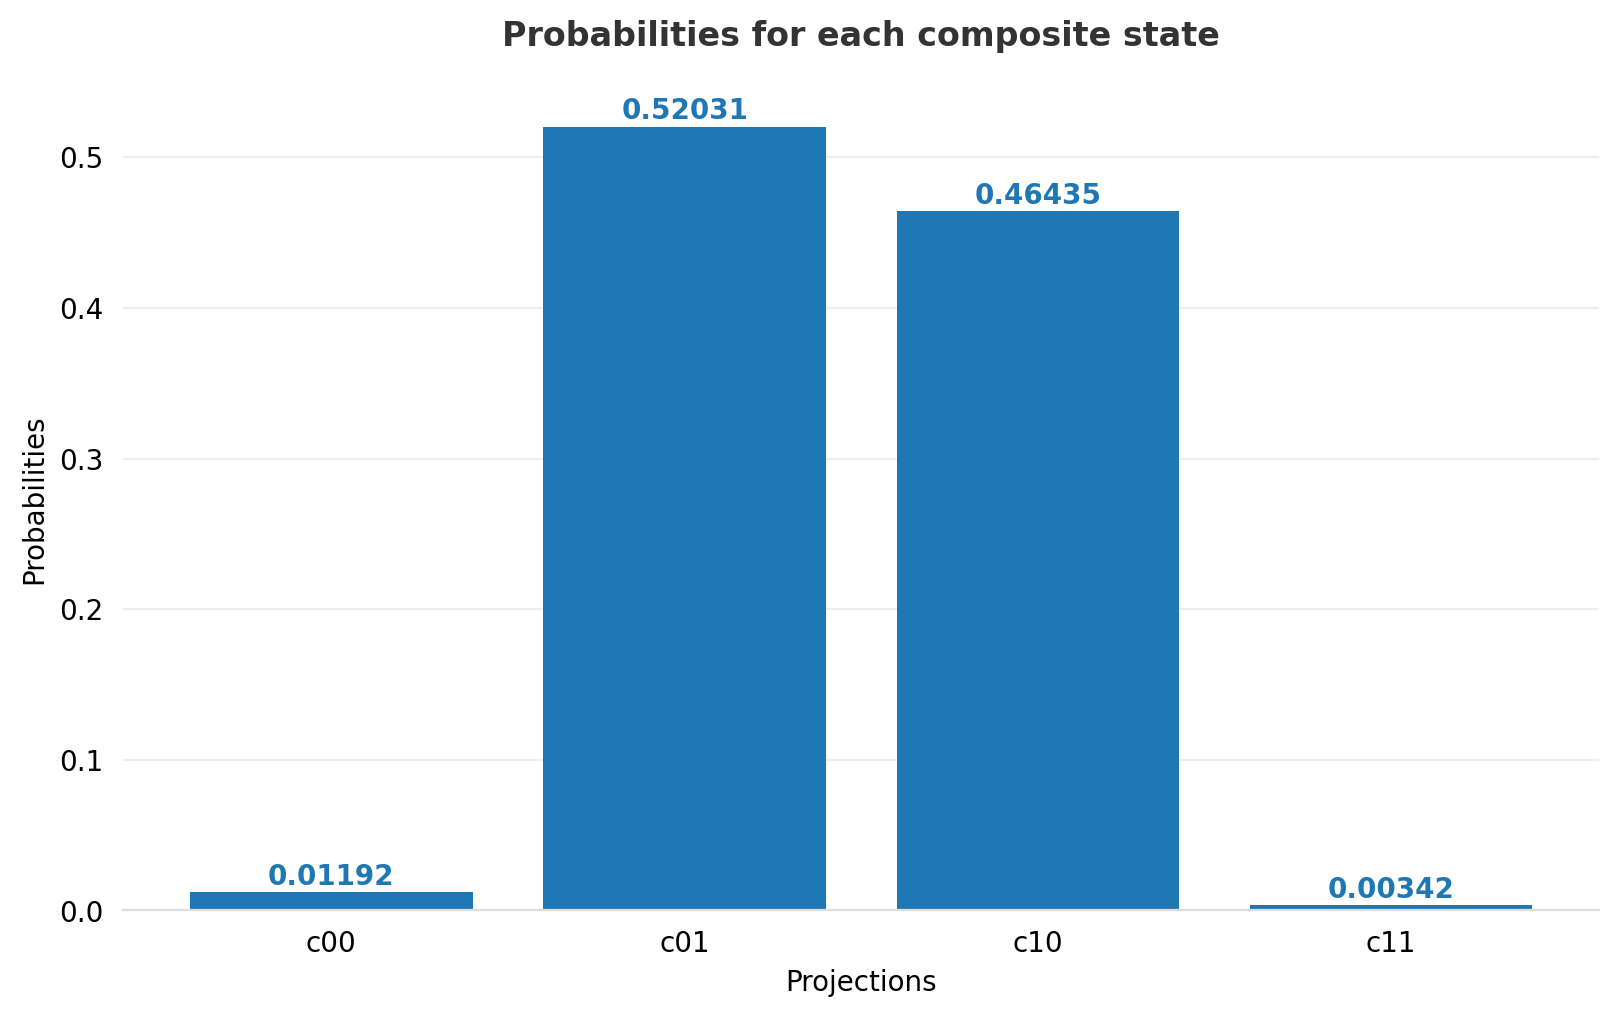

In [85]:
# Return values from dictionary "Coincidence Counts"
values = coincidenceCounts.values()

# Compute sum of the values
total = sum(values)

# Return keys from dictionary "Coincidence Counts"
keys = coincidenceCounts.keys()

probability_list = []
for i in keys:
    probability = coincidenceCounts[i]/total
    probability_list.append(probability)
    
# Plot probabilities

plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()

bars = ax.bar(
    coincidenceCounts.keys(), probability_list
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

bar_color = bars[0].get_facecolor()

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.005,
      round(bar.get_height(), 5),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

ax.set_title('Probabilities for each composite state', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

plt.ylabel("Probabilities")
plt.xlabel("Projections")
plt.show()

In [86]:
# Closing file
file.close()